In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy import interpolate

rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 12]

In [8]:
iterMax = 100
h = 0.05
x_grid = np.arange(-6, 6 + h, h)
y_grid = np.copy(x_grid)
n = len(x_grid)
X, Y = np.meshgrid(x_grid, y_grid)

F1 = 1.5 - 1.6 * np.exp(-0.05 * (3 * np.power(X + 3, 2) + np.power(Y + 3, 2)))
F = F1 + (0.5 - np.exp(-0.1 * (3 * np.power(X - 3, 2) + np.power(Y - 3, 2))))
dFy, dFx = np.gradient(F, h, h)

x0 = np.array([4, 0, -5])
y0 = np.array([0, -5, 2])

x = np.zeros(iterMax + 1)
y = np.copy(x)
f = np.copy(x)

x_out = np.zeros((iterMax + 1, 3));
y_out = np.copy(x_out)
f_out = np.copy(x_out)

interp_type = 'linear'

for jj in range(3):
    q = np.random.permutation(n)
    i1 = np.sort(q[:10])
    q2 = np.random.permutation(n)
    i2 = np.sort(q2[:10])
    x[0] = x0[jj]
    y[0] = y0[jj]

    F_i12 = F[i1[:, np.newaxis], i2]
    dFx_i12 = dFx[i1[:, np.newaxis], i2]
    dFy_i12 = dFy[i1[:, np.newaxis], i2]

    F_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], F_i12, kind=interp_type)
    dfx_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], dFx_i12, kind=interp_type)
    dfy_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], dFy_i12, kind=interp_type)

    f[0] = F_interp(x[0], y[0])
    dfx = dfx_interp(x[0], y[0])
    dfy = dfy_interp(x[0], y[0])

    #     tau = 2
    tau = 1.5
    for j in range(iterMax):
        x[j + 1] = x[j] - tau * dfx  # update x, y, and f
        y[j + 1] = y[j] - tau * dfy
        q = np.random.permutation(n)
        i1 = np.sort(q[:10])
        #         ind1 = np.sort(q[:10])
        q2 = np.random.permutation(n)
        i2 = np.sort(q2[:10])
        #         ind2 = np.sort(q2[:10])

        F_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], F_i12, kind=interp_type)
        dfx_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], dFx_i12, kind=interp_type)
        dfy_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], dFy_i12, kind=interp_type)

        f[j + 1] = F_interp(x[j + 1], y[j + 1])
        dfx = dfx_interp(x[j + 1], y[j + 1])
        dfy = dfy_interp(x[j + 1], y[j + 1])

        if np.abs(f[j + 1] - f[j]) < 10 ** (-6):  # check convergence
            print('Converged after {} iterations'.format(j + 1))
            break
        if j == iterMax - 1:
            print('Failed to converge after {} iterations'.format(j + 1))
    x_out[:, jj] = x
    y_out[:, jj] = y
    f_out[:, jj] = f

    # If converged before iterMax, replace 0s with NaNs
    x_out[(j + 2):, jj] = np.nan
    y_out[(j + 2):, jj] = np.nan
    f_out[(j + 2):, jj] = np.nan

Failed to converge after 100 iterations
Failed to converge after 100 iterations
Failed to converge after 100 iterations


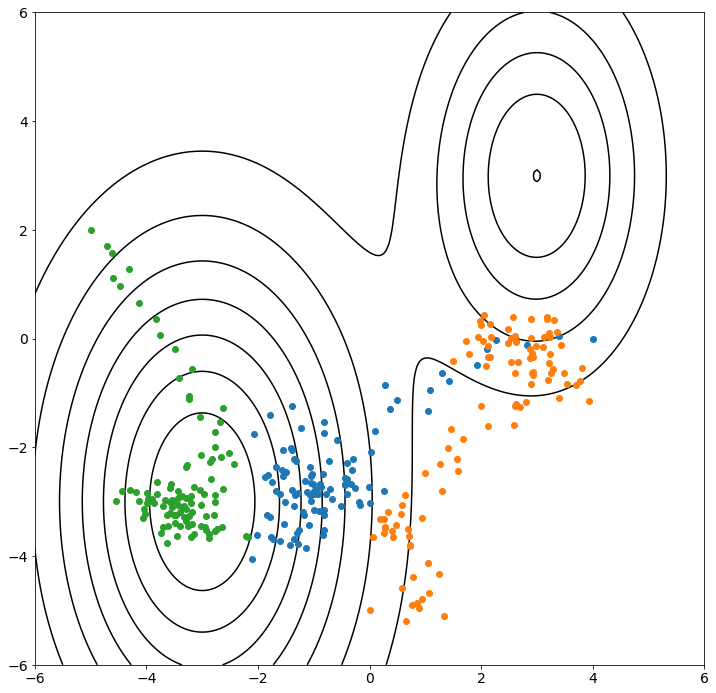

In [9]:
plt.figure()
plt.contour(X, Y, F, colors='k')
for jj in range(3):
    plt.plot(x_out[:, jj], y_out[:, jj], 'o')
plt.show()

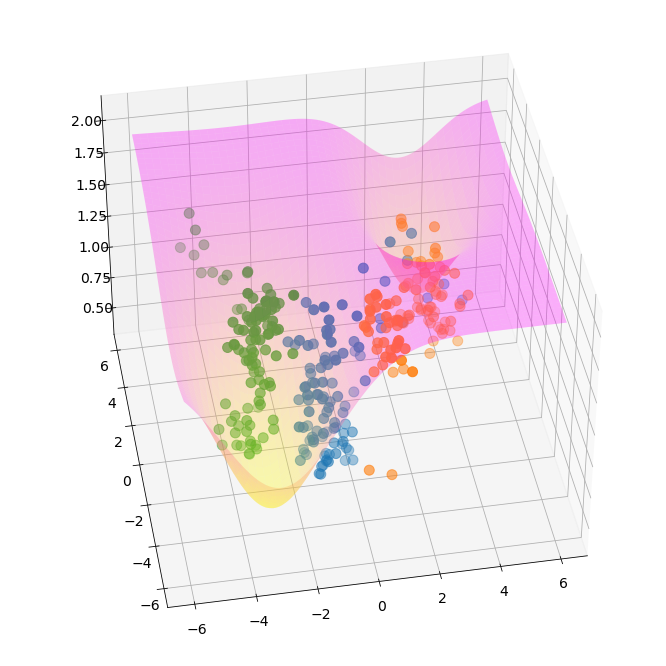

In [10]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F, linewidth=0, cmap='spring_r', alpha=0.3)
for jj in range(3):
    ax.scatter(x_out[:, jj], y_out[:, jj], f_out[:, jj] + 0.1, 'o', s=100)
ax.view_init(elev=40, azim=-100)
plt.show()

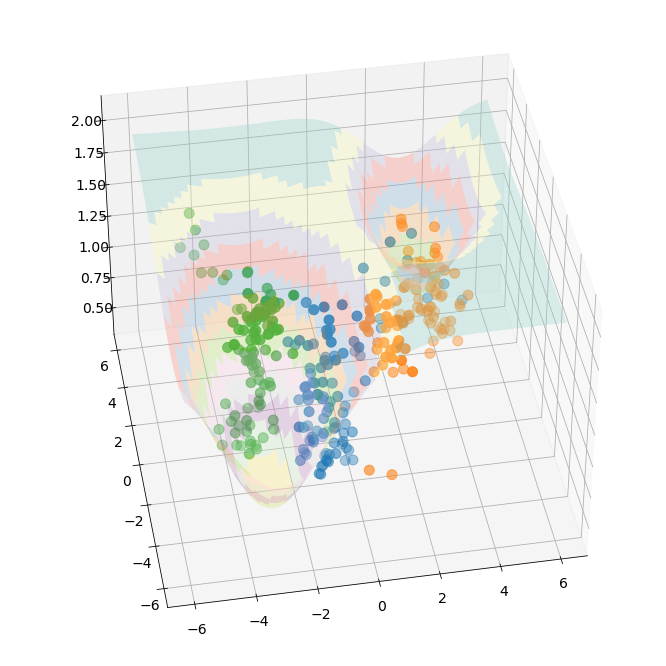

In [11]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F, linewidth=0, cmap='Set3_r', alpha=0.3)
for jj in range(3):
    ax.scatter(x_out[:, jj], y_out[:, jj], f_out[:, jj] + 0.1, 'o', s=100)
ax.view_init(elev=40, azim=-100)
plt.show()

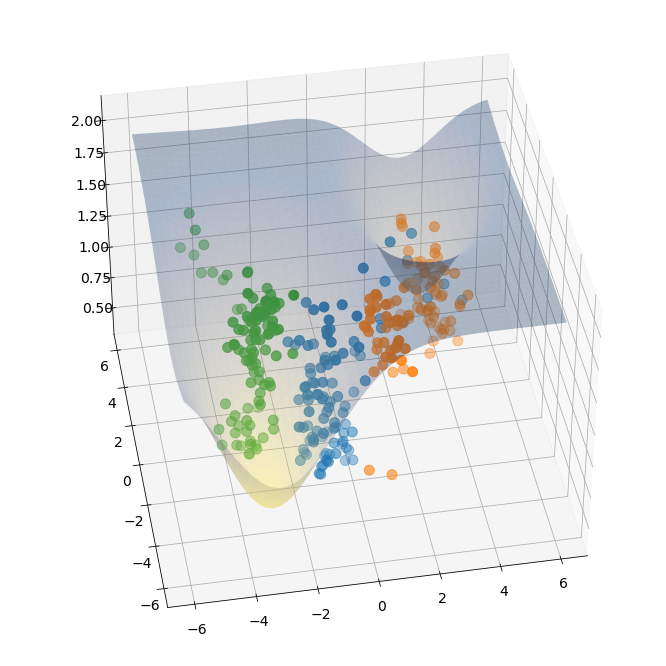

In [12]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F, linewidth=0, cmap='cividis_r', alpha=0.3)
for jj in range(3):
    ax.scatter(x_out[:, jj], y_out[:, jj], f_out[:, jj] + 0.1, 'o', s=100)
ax.view_init(elev=40, azim=-100)
plt.show()